In [35]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import random
from mpl_toolkits.mplot3d import Axes3D

In [36]:
class Block:
   
    # Creating a block class to implement the actual blocks
    def __init__(self, x: int, y: int, number: int, color: str, isHeart: bool, penalty: float = None):
        """
        Parameters
        ----------
        x: int -> X-coordinate of the block
        y: int -> Y-coordinate of the block
        number: int -> Position of block
        color: str -> Color of the block
        isHeart: bool -> `True` if the block is heart, `False` if not.
        penalty: float -> Penalty laid on agent when landing on the block.
        """
        self.x = x
        self.y = y
        self.penalty = penalty
        self.number = number
        self.color = color
        self.isHeart = isHeart
    
    # Overriding string literal for easy printing
    def __str__(self):
        return f"POS: {(self.x, self.y)}\nNUM: {self.number}\nCLR: {self.color}\nHRT: {self.isHeart}\nPEN: {self.penalty}\n"
    
    # Overriding equal-to literal for easy comparision
    def __eq__(self, other):
        if isinstance(other, Block):
            return self.number == other.number

        return self.number == other

In [37]:
# Input from the User
map_1 = [['R', 'G', 'G', 'G', 'R', 'G'],
         ['G', 'G', 'G', 'R', 'G', 'G'],
         ['G', 'G', 'R', 'GH', 'G', 'G'],
         ['G', 'R', 'G', 'G', 'G', 'R'],
         ['R', 'G', 'G', 'G', 'R', 'G'],
         ['G', 'G', 'G', 'R', 'G', 'G']]

In [181]:
# Calculating side length
side = len(map_1)

# Flattening the array
flat_map = np.array(map_1).reshape(side*side)

# Searching for Red or Green heart and its position
rh = np.where(flat_map == 'RH')[0]
gh = np.where(flat_map == 'GH')[0]

# Getting position of heart
heart_number = (rh if rh.size>0 else gh)[0]

# Converting position to coordinates
heart_coordinates = (heart_number//side) ,(heart_number%side)

# Retrieving color of heart
heart_color = 'R' if rh.size>0 else 'G'

# Creating a output map which stores converted version of `map_1`
output_map = [[] for i in range(side)]

print(f"Map Size: ({side} x {side})\nHeart Position: {heart_number}\nHeart Coordinates: {heart_coordinates}\nHeart Color: {heart_color}")

Map Size: (6 x 6)
Heart Position: 15
Heart Coordinates: (2, 3)
Heart Color: G


In [39]:
# Give Agent value: R1: 0; G1: 1;
agent = 0

# Generating a random position to start
start_number = random.randint(0,len(flat_map)-1)
start_number

28

In [40]:
# Loop over sides
for i in range(side):
    
    # Loop over blocks on each side
    for j in range(side):
        
        # Check for 'Red' block
        if map_1[i][j] == 'R':
            # Adding coordinates, position, color, if its a Heart, and penalty based on requirements
            output_map[i].append(Block(x=i, 
                                       y=j, 
                                       number=((j)+(side*i)), 
                                       color=0, 
                                       isHeart=False, 
                                       penalty= ((abs(heart_coordinates[0]-i)+abs(heart_coordinates[1]-j)) + (-5 if heart_color=='R' else 5) + (-10 if agent==0 else 10) + 1)
                                      ))
        # Check for 'Green' block
        if map_1[i][j] == 'G':
            # Adding coordinates, position, color, if its a Heart, and penalty based on requirements
            output_map[i].append(Block(x=i, 
                                       y=j, 
                                       number=((j)+(side*i)), 
                                       color=1, 
                                       isHeart=False, 
                                       penalty= ((abs(heart_coordinates[0]-i)+abs(heart_coordinates[1]-j)) + (-5 if heart_color=='G' else 5) + (-10 if agent==1 else 10) + 1)
                                      ))
        # Check for 'Green Heart' block
        if map_1[i][j] == 'GH':
            # Adding coordinates, position, color, if its a Heart, and penalty based on requirements
            output_map[i].append(Block(x=i, 
                                       y=j, 
                                       number=((j)+(side*i)), 
                                       color=1, isHeart=True, 
                                       penalty= ((abs(heart_coordinates[0]-i)+abs(heart_coordinates[1]-j)) + (-5 if heart_color=='G' else 5) + (-10 if agent==1 else 10) + 1)
                                      ))
        # Check for 'Red Heart' block
        if map_1[i][j] == 'RH':
            # Adding coordinates, position, color, if its a Heart, and penalty based on requirements
            output_map[i].append(Block(x=i, 
                                       y=j, 
                                       number=((j)+(side*i)), 
                                       color=0, 
                                       isHeart=True, 
                                       penalty= ((abs(heart_coordinates[0]-i)+abs(heart_coordinates[1]-j)) + (-5 if heart_color=='R' else 5) + (-10 if agent==0 else 10) + 1)
                                      ))

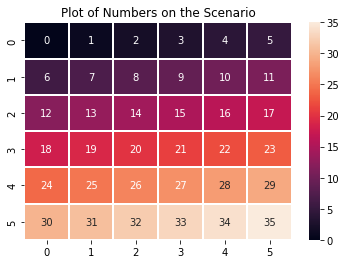

In [41]:
# Heatmap to show the scenario map with positions
nodes = pd.DataFrame([[i.number for i in output_map[j]] for j in range(len(output_map))])
plt.title('Plot of Numbers on the Scenario')
sns.heatmap(nodes, linewidths=0.1, annot=True)
plt.show()

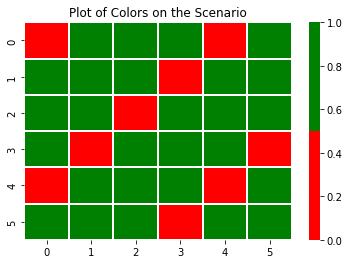

In [42]:
# Heatmap to show the scenario map with colors
colors = pd.DataFrame([[i.color for i in output_map[j]] for j in range(len(output_map))])
plt.title('Plot of Colors on the Scenario')
sns.heatmap(colors, cmap=ListedColormap(['red', 'green']), linewidths=0.1)
plt.show()

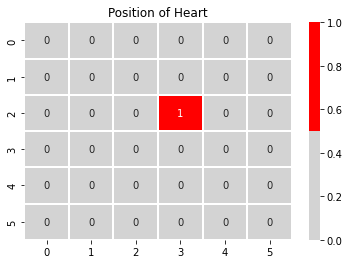

In [43]:
# Heatmap to show the scenario map with position of heart
heart = pd.DataFrame([[i.isHeart for i in output_map[j]] for j in range(len(output_map))])
plt.title('Position of Heart')
sns.heatmap(heart, cmap=ListedColormap(['lightgrey', 'red']), linewidths=0.1, annot=True)
plt.show()

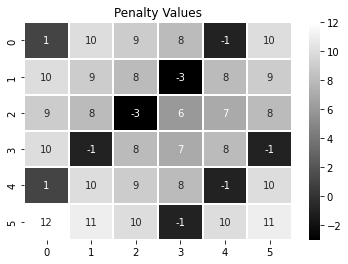

In [44]:
# Heatmap to show the scenario map with penalty values
penalties = pd.DataFrame([[i.penalty for i in output_map[j]] for j in range(len(output_map))])
plt.title('Penalty Values')
sns.heatmap(penalties, cmap="gray", linewidths=0.1, annot=True)
plt.show()

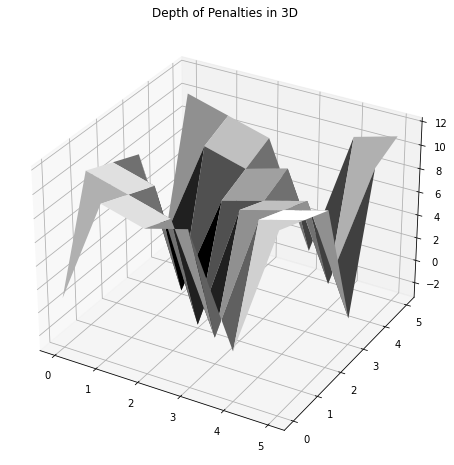

In [45]:
# Heatmap just as above, but in 3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(range(side), range(side))
ax.plot_surface(Y, X, penalties, cmap="gray")
plt.title("Depth of Penalties in 3D")
plt.show()

In [46]:
# Function to generate edge values based on its side value and position
def find_edges(number):
    # We get edge values respectively
    # We get TOP-EDGE from number-side
    # We get BOTTOM-EDGE from number+side
    # We get LEFT-EDGE from number-1
    # We get RIGHT-EDGE from number+1
    edges = [number-side, number+side, number-1, number+1]
    
    # Not all positions have all 4 edges, we filter the out-of-bounds positions
    edges = [i for i in edges if i>=0 and i<=(side*side)-1 and ((number-5)%side!=0 or i!=number+1) and ((number)%side!=0 or i!=number-1)]
    return edges

In [47]:
# Holds from-to-penalty trios
connections = []

# Flattening the map to get info
map_flattened = np.array(output_map).reshape(side*side)

# Create a dictionary with position and penalty as key and values
num_pen = {i.number: i.penalty for i in map_flattened}

# Get from-to-penalty trios and store it in connections
for i in range(side*side):
    connections.extend([(i, j, num_pen[i], num_pen[j]) for j in sorted(find_edges(i))])

In [48]:
# Create a graph with `from` as key and `(to, cost)` as values
graph = {i:[] for i in range(side*side)}

# Function to map values to graph
def addedge(_from, _to, from_cost, to_cost):
    graph[_from].append((_to, to_cost))
    graph[_to].append((_from, from_cost))

# Adding edges to all the connections 
for i in connections:
    addedge(i[0], i[1], i[2], i[3])

In [175]:
# Greedy Best First Search
from queue import PriorityQueue

def best_first_search(actual_Src, target, n):
    """
    Parameters
    ----------
    
    """
    visited = [False] * n
    path = {}
    pq = PriorityQueue()
    pq.put((0, actual_Src))
    visited[actual_Src] = True
    while pq.empty() == False:
        _get = pq.get()
        u = _get[1]
        # Displaying the path having lowest cost
        print(u, end=" ")
        
        if u == target:
            break

        for v, c in graph[u]:
            if visited[v] == False:
                visited[v] = True
                path[v] = u
                pq.put((c, v))
                
    return path


laid_path = best_first_search(start_number, heart_number, side*side)
laid_path

28 22 23 16 15 

{22: 28,
 27: 28,
 29: 28,
 34: 28,
 16: 22,
 21: 22,
 23: 22,
 17: 23,
 10: 16,
 15: 16}

In [161]:
final_path = []
def get_final_path(node: int):
    # print(node)
    final_path.append(node)
    if node == start_number:
        return
    parent = laid_path[node]
    get_final_path(parent)

get_final_path(heart_number)
final_path

[15, 16, 22, 28]

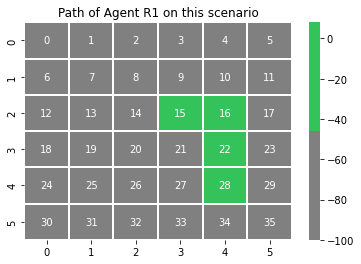

In [164]:
path_map = np.array([[num_pen[((j)+(side*i))] if ((j)+(side*i)) in final_path else -100 for j in range(side)] for i in range(side)])
plt.title(f"Path of Agent {'R1' if agent==0 else 'G1'} on this scenario")
sns.heatmap(path_map, cmap=ListedColormap(['grey', '#34c25a']),linewidths=0.1, annot=np.array(nodes))
plt.show()

In [173]:
final_penalty = path_map.sum() - (side*side*-100) - (100*len(final_path))

In [174]:
final_penalty

20